#PCA Implementation

1. Principal Component Analysis from Scratch

In [1]:
# importing Libraries
# importing the libraries required
import numpy as np                            # importing numpy as np
import pandas as pd                           # importing pandas as pd
import matplotlib.pyplot as plt               # importing matplotlib.pyplot as plt

In [2]:
# loading dataset
dataset=pd.read_csv("Iris.csv")               # loading dataset dynamically into dataset

In [3]:
# printing the dataset
print(dataset.head(5))                        # printing the top 5 rows of dataset

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# preparing the dataset in required format
# assigning values to independent and dependent variable
X = dataset.iloc[:,1:-1]            # assigning value to independent variable ie., all columns except last column and also not taking id into consideration as id not necessary for classification
Y = dataset.iloc[:,-1]              # assigning value to dependent variable ie., last column
print(X)                            # printing the independent variable
print(Y)                            # printing the dependent variable

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [5]:
# Scale the dataset [Standardization of the data]
def fit(X):
  m=X.shape[0]
  n=X.shape[1]
  M=[]
  S=[]
  k=0
  for i in X.columns:
    mean=0                                                        # for mean of each column
    sd=0                                                          # for standard deviation of each column
    mean = np.mean(X[i])                                          # finding mean of each column
    sd = np.sum((X[i]-mean)**2)                          
    sd=sd/(m)
    sd = np.sqrt(sd)                                              # finding standard deviation of each column
    M.append(mean)
    S.append(sd)
  return M,S
def transform(X,M,S):
  for i in range(X.shape[1]):
    for j in range(X.shape[0]):
      cell=X.iat[j,i]
      X.iat[j,i]=(cell-M[i])/S[i]                                 # replacing the data in the dataset with standardized value
  return X
M,S = fit(X)
X=transform(X,M,S)                                                # Standardizing X
print(X)                                                          # printing X_Scaled
X=np.array(X)
Y=np.array(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        -0.900681      1.032057      -1.341272     -1.312977
1        -1.143017     -0.124958      -1.341272     -1.312977
2        -1.385353      0.337848      -1.398138     -1.312977
3        -1.506521      0.106445      -1.284407     -1.312977
4        -1.021849      1.263460      -1.341272     -1.312977
..             ...           ...            ...           ...
145       1.038005     -0.124958       0.819624      1.447956
146       0.553333     -1.281972       0.705893      0.922064
147       0.795669     -0.124958       0.819624      1.053537
148       0.432165      0.800654       0.933356      1.447956
149       0.068662     -0.124958       0.762759      0.790591

[150 rows x 4 columns]


In [6]:
# Subtracting each feature with mean in dataset
X_mean=np.mean(X,axis=0)                                      # finding the mean of features
X_transformed=np.array(X)                                               # initializing X_transformed to X to subtract it from mean
print(X.shape[0],X.shape[1])
for i in range(X.shape[0]):                                   # traversing row-wise
  for j in range(X.shape[1]):                                 # traversing column-wise
    X_transformed[i][j]=(X_transformed[i][j]-X_mean[j])   # subtracting with mean of features
print("Mean of Features : ",X_mean)                           # printing the Mean of features
print("Matrix obtained by subtracting Mean")                  # printing the transformed matrix
print(X_transformed)

150 4
Mean of Features :  [-1.46845499e-15 -1.63424829e-15 -1.42108547e-15 -9.00020799e-16]
Matrix obtained by subtracting Mean
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 

In [7]:
# Calculating the covariance matrix for the features in the dataset
Cov_matrix=X_transformed.T.dot(X_transformed)/X_transformed.shape[0]  # finding the covariance matrix
print(Cov_matrix)                                                     # printing covariance matrix

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [8]:
print(np.cov(X.T))                                         # covariance matrix using numpy function

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [9]:
# calculating Eigen Values and Eigen Vectors for covariance matrix
eigen_values,eigen_vectors = np.linalg.eig(Cov_matrix)    # finding the eigen values and eigen vectors
print("Eigen Values")
print(eigen_values)                                       # printing the eigen values
print("Eigen Vectors")
print(eigen_vectors)                                      # printing the eigen vectors 

Eigen Values
[2.91081808 0.92122093 0.14735328 0.02060771]
Eigen Vectors
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [10]:
# Sorting the eigen values and their corresponding eigen vectors
indx=np.argsort(eigen_values)                       # finding the indexes of eigen values in sorted order
indx=indx[::-1]                                     # arranging the indexes in descending order
eigen_values=eigen_values[indx]                     # sorting the eigen values in descending order
eigen_vectors=eigen_vectors[:,indx]                 # sorting the eigen vectors in descending order
print(indx)                                         # printing the sorted indexes of eigen values
print("Eigen Values in Sorted Order ")              
print(eigen_values)                                 # printing the eigen values
print("Eigen Vectors in Sorted Order ")
print(eigen_vectors)                                # printing the eigen vectors

[0 1 2 3]
Eigen Values in Sorted Order 
[2.91081808 0.92122093 0.14735328 0.02060771]
Eigen Vectors in Sorted Order 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [11]:
# printing the explained variances
explained_variances=[]
for i in range(len(eigen_values)):
    explained_variances.append(eigen_values[i]/np.sum(eigen_values))
print(np.sum(explained_variances))
print(explained_variances)

0.9999999999999999
[0.7277045209380133, 0.23030523267680636, 0.036838319576273856, 0.00515192680890638]


In [12]:
# Choose first 2 eigen vectors
choosen_eigenvectors=eigen_vectors[:,0:2]             # taking 2 eigen vectors into consideration
print("Choosen Eigen Vectors")                    
print(choosen_eigenvectors)                           # printing the choosen eigen vectors
data=np.matmul(X_transformed,choosen_eigenvectors)    # transforming the data
transformed_data=pd.DataFrame({"PC1":data[:,0],"PC2":data[:,1],"Species":Y}) # creating dataframe for transformed data

Choosen Eigen Vectors
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [13]:
# printing the transformed data
print(transformed_data)

          PC1       PC2         Species
0   -2.264542 -0.505704     Iris-setosa
1   -2.086426  0.655405     Iris-setosa
2   -2.367950  0.318477     Iris-setosa
3   -2.304197  0.575368     Iris-setosa
4   -2.388777 -0.674767     Iris-setosa
..        ...       ...             ...
145  1.870522 -0.382822  Iris-virginica
146  1.558492  0.905314  Iris-virginica
147  1.520845 -0.266795  Iris-virginica
148  1.376391 -1.016362  Iris-virginica
149  0.959299  0.022284  Iris-virginica

[150 rows x 3 columns]


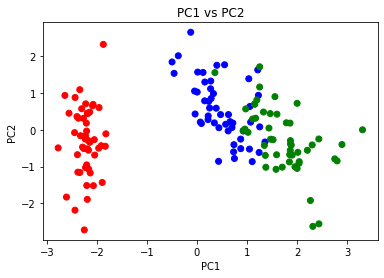

In [14]:
# plotting the data
def getcolor(Y):
  l=[]
  for i in range(len(Y)):
    if(Y[i]=='Iris-setosa'): 
      l.append('red')
    elif(Y[i]=='Iris-versicolor'):
      l.append('blue')
    else: 
      l.append('green')
  return l
# plotting test data
plt.scatter(transformed_data['PC1'],transformed_data['PC2'], color = getcolor(Y))    # plotting graph of dataset of scatter points
plt.title('PC1 vs PC2')                                                              # giving the title to the graph
plt.xlabel('PC1')                                                                    # labelling the x-coordinate of graph
plt.ylabel('PC2')                                                                    # labelling the y-coordinate of graph
plt.show()                                                                           # plotting the graph                                                                                                                   # plotting the graph

In [15]:
print("Transformed Matrix")
print(transformed_data)

Transformed Matrix
          PC1       PC2         Species
0   -2.264542 -0.505704     Iris-setosa
1   -2.086426  0.655405     Iris-setosa
2   -2.367950  0.318477     Iris-setosa
3   -2.304197  0.575368     Iris-setosa
4   -2.388777 -0.674767     Iris-setosa
..        ...       ...             ...
145  1.870522 -0.382822  Iris-virginica
146  1.558492  0.905314  Iris-virginica
147  1.520845 -0.266795  Iris-virginica
148  1.376391 -1.016362  Iris-virginica
149  0.959299  0.022284  Iris-virginica

[150 rows x 3 columns]


2. Implementing PCA along with Logistic Regression

In [16]:
# importing Libraries
# importing the libraries required
import numpy as np                            # importing numpy as np
import pandas as pd                           # importing pandas as pd
import matplotlib.pyplot as plt               # importing matplotlib.pyplot as plt

In [17]:
# loading dataset
dataset=pd.read_csv("framingham.csv")               # loading dataset dynamically into dataset
dataset=dataset.dropna()

In [18]:
# printing the dataset
print(dataset.head(5))                        # printing the top 5 rows of dataset

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [19]:
# preparing the dataset in required format
# assigning values to independent and dependent variable
X = dataset.iloc[:,:-1]             # assigning value to independent variable ie., all columns except last column and also not taking id into consideration as id not necessary for classification
Y = dataset.iloc[:,-1]              # assigning value to dependent variable ie., last column
print(X)                            # printing the independent variable
print(Y)                            # printing the dependent variable

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [20]:
# Scale the dataset [Standardization of the data]
def fit(X):
  m=X.shape[0]
  n=X.shape[1]
  M=[]
  S=[]
  k=0
  for i in X.columns:
    mean=0                                                        # for mean of each column
    sd=0                                                          # for standard deviation of each column
    mean = np.mean(X[i])                                          # finding mean of each column
    sd = np.sum((X[i]-mean)**2)                          
    sd=sd/(m)
    sd = np.sqrt(sd)                                              # finding standard deviation of each column
    M.append(mean)
    S.append(sd)
  return M,S
def transform(X,M,S):
  for i in range(X.shape[1]):
    for j in range(X.shape[0]):
      cell=X.iat[j,i]
      X.iat[j,i]=(cell-M[i])/S[i]                                 # replacing the data in the dataset with standardized value
  return X
M,S = fit(X)
X=transform(X,M,S)                                                # Standardizing X
print(X)                                                          # printing X_Scaled
X=np.array(X)
Y=np.array(Y)

          male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0     1.119825 -1.233351   1.975752      -0.978352   -0.757068 -0.176951   
1    -0.892997 -0.415591   0.019795      -0.978352   -0.757068 -0.176951   
2     1.119825 -0.181945  -0.958183       1.022127    0.921174 -0.176951   
3    -0.892997  1.336754   0.997773       1.022127    1.760294 -0.176951   
4    -0.892997 -0.415591   0.997773       1.022127    1.172910 -0.176951   
...        ...       ...        ...            ...         ...       ...   
4231  1.119825  0.986285   0.997773      -0.978352   -0.757068 -0.176951   
4232  1.119825  2.154514  -0.958183      -0.978352   -0.757068 -0.176951   
4233  1.119825  0.051701  -0.958183       1.022127   -0.673156 -0.176951   
4234  1.119825  0.168524   0.997773       1.022127    2.851151 -0.176951   
4237 -0.892997  0.285347   0.019795      -0.978352   -0.757068 -0.176951   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0       

In [21]:
# Subtracting each feature with mean in dataset
X_mean=np.mean(X,axis=0)                                      # finding the mean of features
X_transformed=np.array(X)                                     # initializing X_transformed to X to subtract it from mean
print(X.shape[0],X.shape[1])
for i in range(X.shape[0]):                                   # traversing row-wise
  for j in range(X.shape[1]):                                 # traversing column-wise
    X_transformed[i][j]=(X_transformed[i][j]-X_mean[j])       # subtracting with mean of features
print("Mean of Features : ",X_mean)                           # printing the Mean of features
print("Matrix obtained by subtracting Mean")                  # printing the transformed matrix
print(X_transformed)

3656 15
Mean of Features :  [-2.52654693e-17 -3.46914328e-16 -6.02484267e-17  1.63253801e-16
 -8.16269007e-17 -4.66439433e-17 -7.77399054e-18 -3.49829574e-17
  1.94349764e-17  1.58880932e-16 -1.37016583e-16 -5.77218798e-16
  1.69550734e-14 -4.66439433e-17 -9.71748818e-17]
Matrix obtained by subtracting Mean
[[ 1.11982472 -1.23335117  1.97575158 ...  0.29168785  0.35633992
  -0.20312694]
 [-0.8929969  -0.41559058  0.01979497 ...  0.7246142   1.60828949
  -0.24495595]
 [ 1.11982472 -0.1819447  -0.95818334 ... -0.10926099 -0.06097661
  -0.49592996]
 ...
 [ 1.11982472  0.05170118 -0.95818334 ...  0.04570696 -0.81214636
   0.17333408]
 [ 1.11982472  0.16852412  0.99777327 ... -1.49413337 -0.89560966
  -0.57958797]
 [-0.8929969   0.28534706  0.01979497 ... -1.06120701  0.35633992
   1.05174313]]


In [22]:
# Calculating the covariance matrix for the features in the dataset
Cov_matrix=X_transformed.T.dot(X_transformed)/X_transformed.shape[0]  # finding the covariance matrix
print(Cov_matrix)                                                     # printing covariance matrix

[[ 1.00000000e+00 -2.43869912e-02  1.76768430e-02  2.06777930e-01
   3.31242846e-01 -5.21281205e-02 -2.30752176e-03  8.05743727e-04
   1.38330267e-02 -7.02285291e-02 -4.54844109e-02  5.15751876e-02
   7.28673292e-02 -1.14923400e-01  3.04817855e-03]
 [-2.43869912e-02  1.00000000e+00 -1.58961341e-01 -2.10862368e-01
  -1.89099490e-01  1.34670170e-01  5.08638692e-02  3.06692997e-01
   1.09026510e-01  2.67763684e-01  3.88550599e-01  2.08880362e-01
   1.37172104e-01 -2.68542643e-03  1.18244733e-01]
 [ 1.76768430e-02 -1.58961341e-01  1.00000000e+00  2.52528518e-02
   1.35271093e-02 -1.36467912e-02 -3.03527976e-02 -7.90996577e-02
  -3.95468261e-02 -1.29556316e-02 -1.24510621e-01 -5.85015079e-02
  -1.37280060e-01 -6.42539618e-02 -3.18741872e-02]
 [ 2.06777930e-01 -2.10862368e-01  2.52528518e-02  1.00000000e+00
   7.73818937e-01 -5.19358242e-02 -3.81594924e-02 -1.07560950e-01
  -4.18587123e-02 -5.11193922e-02 -1.34370979e-01 -1.15747962e-01
  -1.59573578e-01  5.04518224e-02 -5.33460079e-02]
 [ 3

In [23]:
print(np.cov(X.T))                                         # covariance matrix using numpy function

[[ 1.00027360e+00 -2.43936635e-02  1.76816794e-02  2.06834504e-01
   3.31333473e-01 -5.21423826e-02 -2.30815309e-03  8.05964177e-04
   1.38368114e-02 -7.02477435e-02 -4.54968554e-02  5.15892985e-02
   7.28872656e-02 -1.14954843e-01  3.04901253e-03]
 [-2.43936635e-02  1.00027360e+00 -1.59004832e-01 -2.10920060e-01
  -1.89151227e-01  1.34707016e-01  5.08777854e-02  3.06776908e-01
   1.09056339e-01  2.67836944e-01  3.88656905e-01  2.08937511e-01
   1.37209634e-01 -2.68616116e-03  1.18277084e-01]
 [ 1.76816794e-02 -1.59004832e-01  1.00027360e+00  2.52597609e-02
   1.35308103e-02 -1.36505249e-02 -3.03611020e-02 -7.91212992e-02
  -3.95576461e-02 -1.29591762e-02 -1.24544686e-01 -5.85175138e-02
  -1.37317620e-01 -6.42715415e-02 -3.18829079e-02]
 [ 2.06834504e-01 -2.10920060e-01  2.52597609e-02  1.00027360e+00
   7.74030652e-01 -5.19500337e-02 -3.81699328e-02 -1.07590379e-01
  -4.18701648e-02 -5.11333783e-02 -1.34407743e-01 -1.15779631e-01
  -1.59617237e-01  5.04656260e-02 -5.33606032e-02]
 [ 3

In [24]:
# calculating Eigen Values and Eigen Vectors for covariance matrix
eigen_values,eigen_vectors = np.linalg.eig(Cov_matrix)    # finding the eigen values and eigen vectors
print("Eigen Values")
print(eigen_values)                                       # printing the eigen values
print("Eigen Vectors")
print(eigen_vectors)                                      # printing the eigen vectors 

Eigen Values
[3.22852162 1.88384301 1.56833229 0.1718172  0.21210694 0.37638231
 0.39068328 0.58382767 0.69164653 0.79108678 0.8720366  1.12023858
 1.00664177 1.05823925 1.04459615]
Eigen Vectors
[[ 5.46746209e-02 -3.63895456e-01  4.31062316e-02 -7.70826925e-02
  -1.24909679e-01 -2.35111886e-02 -2.15282574e-02  2.73199465e-01
   5.95471959e-01 -6.82476682e-03  1.82155316e-01 -5.27644566e-01
   1.71000803e-01  2.63353598e-01 -2.67414685e-02]
 [-2.94808504e-01  9.61188689e-02  2.58058897e-02  1.50714982e-01
   6.89085413e-04  9.16453326e-02  6.04859409e-02 -5.93052658e-01
   2.50496384e-01 -3.34191808e-01 -7.69029659e-02 -1.21673687e-01
   2.44064964e-01 -9.57422814e-03  5.11750218e-01]
 [ 1.07457569e-01  1.69129225e-02 -3.08347218e-02 -3.59499846e-02
   3.01276850e-03  1.42647530e-02 -3.27381434e-03 -3.08715160e-01
   5.60741274e-02 -4.98294888e-02  2.91626258e-01  3.70123854e-03
   5.46041458e-01 -4.16794343e-01 -5.72564107e-01]
 [ 1.99546068e-01 -5.88095562e-01  5.06328396e-02  2.3943

In [25]:
# Sorting the eigen values and their corresponding eigen vectors
indx=np.argsort(eigen_values)                       # finding the indexes of eigen values in sorted order
indx=indx[::-1]                                     # arranging the indexes in descending order
eigen_values=eigen_values[indx]                     # sorting the eigen values in descending order
eigen_vectors=eigen_vectors[:,indx]                 # sorting the eigen vectors in descending order
print(indx)                                         # printing the sorted indexes of eigen values
print("Eigen Values in Sorted Order ")              
print(eigen_values)                                 # printing the eigen values
print("Eigen Vectors in Sorted Order ")
print(eigen_vectors)                                # printing the eigen vectors

[ 0  1  2 11 13 14 12 10  9  8  7  6  5  4  3]
Eigen Values in Sorted Order 
[3.22852162 1.88384301 1.56833229 1.12023858 1.05823925 1.04459615
 1.00664177 0.8720366  0.79108678 0.69164653 0.58382767 0.39068328
 0.37638231 0.21210694 0.1718172 ]
Eigen Vectors in Sorted Order 
[[ 5.46746209e-02 -3.63895456e-01  4.31062316e-02 -5.27644566e-01
   2.63353598e-01 -2.67414685e-02  1.71000803e-01  1.82155316e-01
  -6.82476682e-03  5.95471959e-01  2.73199465e-01 -2.15282574e-02
  -2.35111886e-02 -1.24909679e-01 -7.70826925e-02]
 [-2.94808504e-01  9.61188689e-02  2.58058897e-02 -1.21673687e-01
  -9.57422814e-03  5.11750218e-01  2.44064964e-01 -7.69029659e-02
  -3.34191808e-01  2.50496384e-01 -5.93052658e-01  6.04859409e-02
   9.16453326e-02  6.89085413e-04  1.50714982e-01]
 [ 1.07457569e-01  1.69129225e-02 -3.08347218e-02  3.70123854e-03
  -4.16794343e-01 -5.72564107e-01  5.46041458e-01  2.91626258e-01
  -4.98294888e-02  5.60741274e-02 -3.08715160e-01 -3.27381434e-03
   1.42647530e-02  3.012768

In [26]:
# printing the explained variances
explained_variances=[]
for i in range(len(eigen_values)):
    explained_variances.append(eigen_values[i]/np.sum(eigen_values))
print(np.sum(explained_variances))
print(explained_variances)

0.9999999999999998
[0.21523477467968066, 0.12558953431189085, 0.10455548576053597, 0.07468257185227345, 0.07054928350559894, 0.0696397433407521, 0.06710945119504833, 0.05813577364990572, 0.05273911892919328, 0.046109768589843704, 0.03892184484146377, 0.026045552305331458, 0.02509215426426122, 0.014140462728709901, 0.011454480045510473]


In [27]:
# Choose first 5 eigen vectors
choosen_eigenvectors=eigen_vectors[:,0:5]             # taking 5 eigen vectors into consideration
print("Choosen Eigen Vectors")                    
print(choosen_eigenvectors)                           # printing the choosen eigen vectors
data=np.matmul(X_transformed,choosen_eigenvectors)    # transforming the data
transformed_data=pd.DataFrame({"PC1":data[:,0],"PC2":data[:,1],"PC3":data[:,2],"PC4":data[:,3],"PC5":data[:,4],"Species":Y}) # creating dataframe for transformed data

Choosen Eigen Vectors
[[ 0.05467462 -0.36389546  0.04310623 -0.52764457  0.2633536 ]
 [-0.2948085   0.09611887  0.02580589 -0.12167369 -0.00957423]
 [ 0.10745757  0.01691292 -0.03083472  0.00370124 -0.41679434]
 [ 0.19954607 -0.58809556  0.05063284  0.11046361 -0.13725217]
 [ 0.16949064 -0.63266357  0.04293371  0.03510651 -0.06546762]
 [-0.20878548 -0.04274692 -0.05277178 -0.14740065 -0.5397049 ]
 [-0.0683295   0.01711142 -0.02703162 -0.34191905 -0.50734591]
 [-0.42983319 -0.16016912 -0.12075133 -0.01185563 -0.02934169]
 [-0.1349491   0.00518461  0.68507362 -0.05322854 -0.02100371]
 [-0.19482989 -0.01945319 -0.00928059  0.2248992  -0.20370357]
 [-0.48085117 -0.15084757 -0.10411601  0.04039611 -0.00134662]
 [-0.43551138 -0.19486996 -0.15705885  0.00506375  0.08277814]
 [-0.28586198 -0.06280014 -0.02966469 -0.17113738  0.36585677]
 [-0.12800012 -0.13767643  0.07318006  0.68551491  0.01424156]
 [-0.14774936  0.0113193   0.68034311 -0.01652586 -0.03640071]]


In [28]:
# printing the transformed data
print(transformed_data)

           PC1       PC2       PC3       PC4       PC5  Species
0     1.797098  1.013861  0.033511 -0.568771  0.049370        0
1    -0.011722  1.286082 -0.148093  1.484008  0.325456        0
2     1.014084 -1.425254 -0.136436 -0.341690  0.572553        0
3    -1.391361 -1.698943  0.086765 -0.239207 -0.481411        1
4     0.807065 -1.014466  0.152888  1.631250 -1.156849        0
...        ...       ...       ...       ...       ...      ...
3651 -0.900518  0.483253 -0.318864 -0.758361  0.296278        0
3652 -2.222222  0.379511 -0.729025 -1.974018  1.075602        1
3653 -2.158214 -1.215705 -0.478291 -0.558092  0.398627        1
3654  2.152821 -2.354985 -0.169042 -0.838769 -0.712264        0
3655 -0.168015  1.526350  0.624402  0.945306 -0.474358        0

[3656 rows x 6 columns]


In [29]:
# Applying logistic regression for transformed data
X=transformed_data.iloc[:,:-1].values  
Y=transformed_data.iloc[:,-1].values

In [30]:
# Now applying Logistic Regression
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

In [31]:
#printing data
print("X Train","\n",X_train)                        # printing X_train
print("Y Train","\n",Y_train)                        # printing Y_train
print("X Test","\n",X_test)                          # printing X_test
print("Y Test","\n",Y_test)                          # printing Y_test

X Train 
 [[-1.04341105  0.45339663 -1.02082594 -0.87657186  0.67528497]
 [-1.1553953   0.08496446 -1.64782948 -0.8800527   0.78929282]
 [-3.37500773  0.55560217 -0.98882655  0.54750032  0.37615077]
 ...
 [ 1.59092568 -0.7659924   0.24319636 -0.96849391 -0.99498061]
 [ 1.05424419  1.27536012 -0.14924521  1.96141592  0.10153928]
 [-1.87392398  0.37148439 -0.31756883 -1.35728995  1.33201654]]
Y Train 
 [0 0 0 ... 0 0 0]
X Test 
 [[ 1.78733827 -0.66689941  0.18939458 -2.10654151 -0.50803075]
 [ 1.55362252 -2.51843402  0.11087129 -0.38037683 -0.04744196]
 [-0.11304007  1.25451864 -0.29185877  0.20844249  0.80750378]
 ...
 [-0.79268233 -0.60394496 -0.13171425 -1.11282149  0.83115729]
 [ 1.76178344 -1.35219842  0.10044397 -0.60490408 -0.4223579 ]
 [ 0.37797013  1.56597851 -0.45497099  0.72163254 -1.21845641]]
Y Test 
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler      # importing standardscalar for standardization
sc = StandardScaler()                                 # creating an instance of standard scalar
X_train=sc.fit_transform(X_train)                     # Standardizing X_train
X_test=sc.fit_transform(X_test)                       # Standardizing X_test

In [33]:
# Training the Logistic Regression with the Training Data
from sklearn.linear_model import LogisticRegression   # importing Logistic Regression for applying Logistic Regression
classifier = LogisticRegression(random_state = 0)     # Creating an instance of Logistic Regression
classifier.fit(X_train,Y_train)                       # Training Logistic Regression with Training Data

LogisticRegression(random_state=0)

In [34]:
# predicting the test data
Y_pred=classifier.predict(X_test)                     # predicting the test data
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))  # printing test and predicted data

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [35]:
# Making the Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score # importing confusion matrix and accuracy score
cm=confusion_matrix(Y_test,Y_pred)                          # creating confusion matrix
print("Confusion Matrix","\n",cm)                           # printing confusion matrix
print("Accuracy : ",accuracy_score(Y_test,Y_pred))          # calculating and printing the accuracy score

Confusion Matrix 
 [[618   5]
 [105   4]]
Accuracy :  0.8497267759562842
